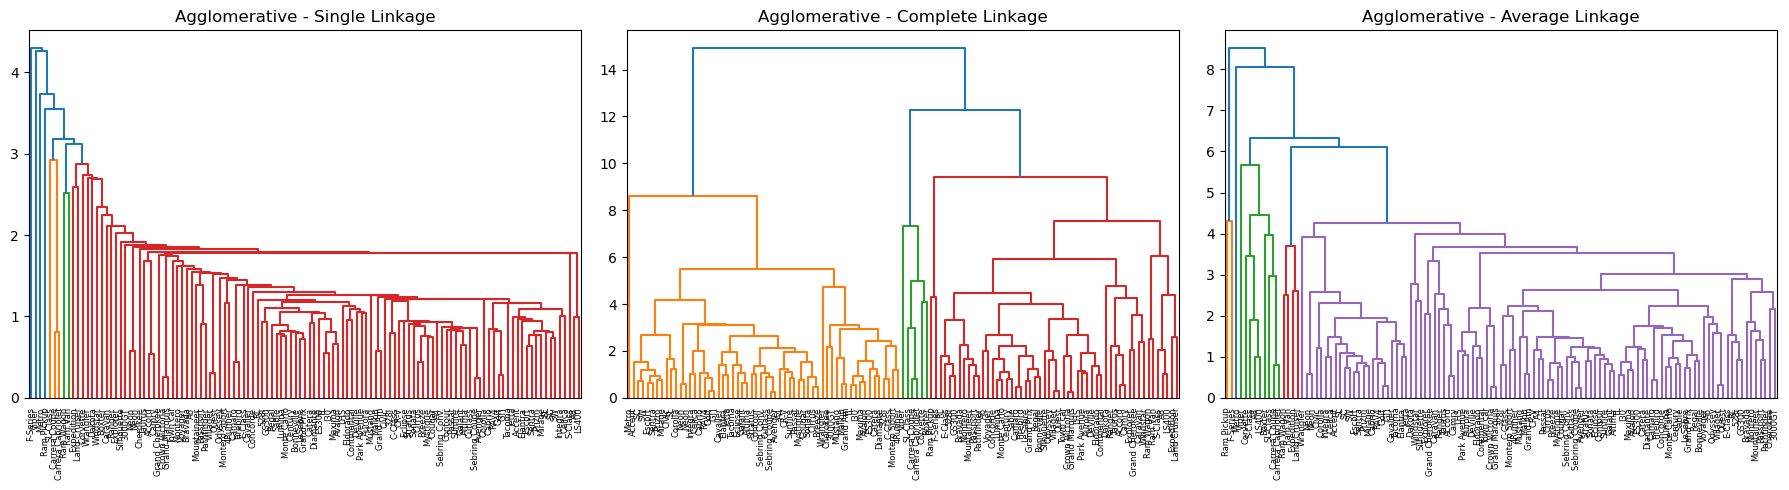

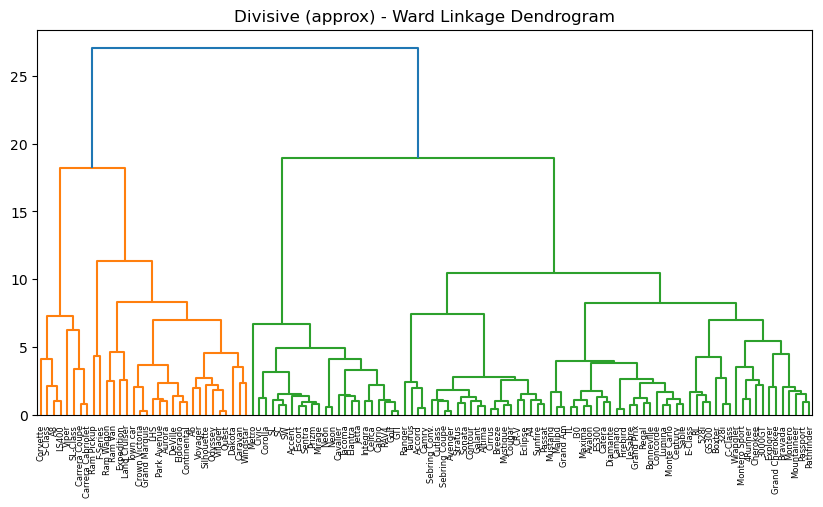

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset
df = pd.read_csv("cars_clus.csv")

# Step 2: Data Cleaning
# Drop rows with missing manufacturer
df = df.dropna(subset=['manufact'])

# Convert numeric columns from object to float
numeric_columns = df.columns.drop(['manufact', 'model', 'type'])
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any missing values after conversion
df = df.dropna()

# Store model names for labeling dendrograms
labels = df['model'].values

# Step 3: Feature selection and normalization
features = df[['sales', 'resale', 'price', 'engine_s', 'horsepow',
               'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 4: Agglomerative Clustering Dendrograms
linkage_methods = ['single', 'complete', 'average']

plt.figure(figsize=(18, 5))
for i, method in enumerate(linkage_methods):
    plt.subplot(1, 3, i+1)
    Z = linkage(features_scaled, method=method)
    dendrogram(Z, labels=labels, leaf_rotation=90, leaf_font_size=6)
    plt.title(f'Agglomerative - {method.title()} Linkage')
plt.tight_layout()
plt.show()

# Step 5: Divisive Clustering (Approximated with top-down dendrogram)
# SciPy doesn't implement true divisive clustering, but dendrogram can still visualize splits
Z_div = linkage(features_scaled, method='ward')  # Ward is often used for divisive-like splits
plt.figure(figsize=(10, 5))
dendrogram(Z_div, labels=labels, leaf_rotation=90, leaf_font_size=6)
plt.title('Divisive (approx) - Ward Linkage Dendrogram')
plt.show()
